
### Import necessary libraries

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Merging data from each month into one CSV

In [6]:
files = [file for file in os.listdir(r"C:\Users\anmol\Exploring-Data\Sales Analysis\sales data")]

for file in files:
    print(file) 

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [12]:
sales_data =pd.DataFrame()
for file in files:
    file_path =os.path.join(r"C:\Users\anmol\Exploring-Data\Sales Analysis\sales data",file)
    df = pd.read_csv(file_path)
    sales_data = pd.concat([sales_data,df])

sales_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [15]:
sales_data.to_csv("combined_sales_data.csv", index =False)

In [16]:
data =pd.read_csv("combined_sales_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the Data



In [23]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Drop rows of NAN

In [25]:
data_nan = data[data.isna().any(axis=1)]
data_nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data =data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [34]:
data = data[data['Order Date'].str[0:2] !='Or'] # Getting rid of text in order date column

In [41]:
data['Month'] = data['Order Date'].str[0:2]   # Augmenting data with month cloumn
data['Month'] = pd.to_numeric(data['Month'])

In [36]:
data['Quantity Ordered'] =pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] =pd.to_numeric(data['Price Each'])  # Converting the data types in preferred forms

### Data Exploration!

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


### Review the best month for sales in terms of total earnings.


In [44]:
data['Sales'] =data['Quantity Ordered'] * data['Price Each'] # Vectorized calculation of total sales for each order

In [49]:
data_best_sales = data[data['Sales'] == data['Sales'].max()]
data_best_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
4717,181069,Macbook Pro Laptop,2,1700.0,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.0
5219,181544,Macbook Pro Laptop,2,1700.0,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.0
92026,210292,Macbook Pro Laptop,2,1700.0,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0
127265,200528,Macbook Pro Laptop,2,1700.0,05/13/19 13:40,"643 4th St, Boston, MA 02215",5,3400.0


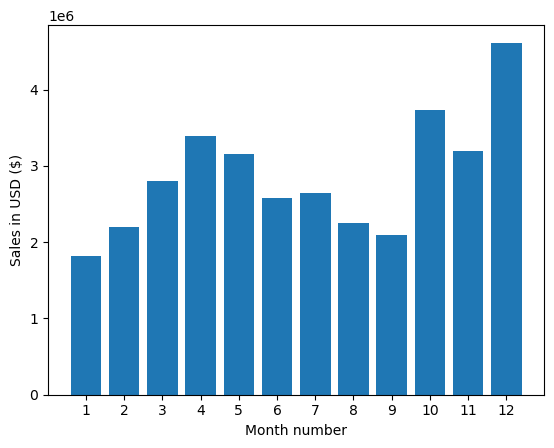

In [51]:
max_sales = data.groupby('Month').sum()

months =range(1,13)
plt.bar(months,max_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


### Determine which city sold the most products.

In [65]:
def city_column(address):
    return address.split(',')[1]

def state_column(address):
     return address.split(',')[2].split(" ")[1]

# Creating a 'City' column by combining city and state
data['City'] = data['Purchase Address'].apply(lambda x : f"{city_column(x)} {state_column(x)}")
data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [95]:
max_sales_city = data.groupby('City')['Sales'].sum()
max_sales_city

City
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Sales, dtype: float64

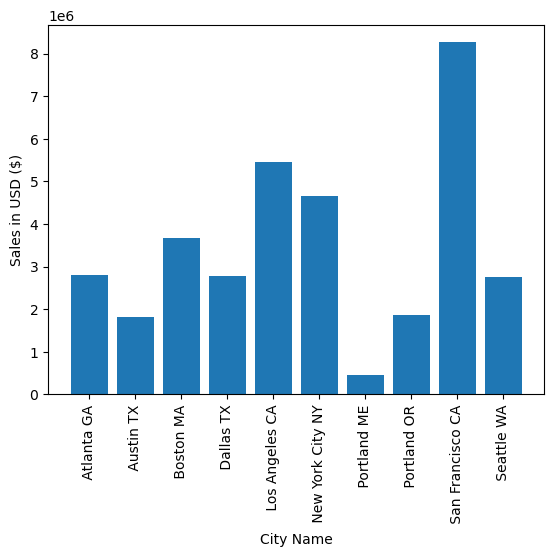

In [97]:
cities = [city for city, df in data.groupby('City')] 
# Groupby Object: data.groupby('City') returns a GroupBy object, which is iterable.
# Each iteration yields a tuple (city, df), where:
# - city is the group key (city name) for the current group of data.
# - df is a DataFrame containing all rows where the 'City' column matches the current city.

plt.bar(cities, max_sales_city)
plt.xticks(cities, rotation ='vertical', size = 10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

In [103]:
data['Hour'] =pd.to_datetime(data['Order Date']).dt.hour
data['Minute'] =pd.to_datetime(data['Order Date']).dt.minute
data.head()

C:\Users\anmol\AppData\Local\Temp\ipykernel_12084\208600468.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] =pd.to_datetime(data['Order Date']).dt.hour
C:\Users\anmol\AppData\Local\Temp\ipykernel_12084\208600468.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Minute'] =pd.to_datetime(data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


### Determine the best time to display advertisements to maximize the likelihood of customer purchases.

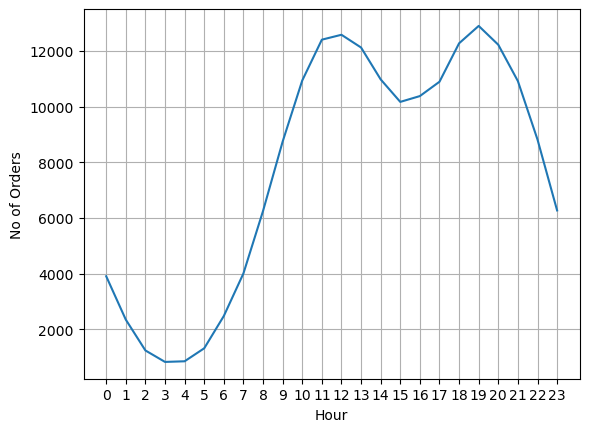

In [111]:
hours =[hour for hour,df in data.groupby('Hour')]

plt.plot(hours, data.groupby('Hour').count()['Quantity Ordered']) 

#computes the number of records (rows) 
# for each unique 'Hour' value in the DataFrame `data`

plt.xticks(hours, size = 10)
plt.ylabel('No of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

### Products  most often sold together.

In [124]:
df =df[df['Order ID'].duplicated(keep =False)]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001"
60,248210,iPhone,1,700.0,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016"
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001"


In [151]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

# When using apply() with ','.join directly on a Series, ','.join expects a list or iterable of strings,
# causing unexpected behavior because apply() passes each group as a Series instead of a list.

# Series to Iterable Conversion: transform() passes the group (Series) to ','.join, converting it internally
# into an iterable (like a list) that ','.join can correctly process for aggregating strings within groups.



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Grouped
20,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001","USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,09/05/19 15:06,"705 Hill St, New York City, NY 10001","USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.0,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016","iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,09/27/19 10:33,"292 Washington St, San Francisco, CA 94016","iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001","Bose SoundSport Headphones,Google Phone"
...,...,...,...,...,...,...,...
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301","Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301","Wired Headphones,AAA Batteries (4-pack)"
11662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016","Google Phone,USB-C Charging Cable"


In [152]:
df1 = df[['Order ID', 'Grouped']].drop_duplicates().dropna()
df1


,Order ID,Grouped
20,248171,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,"iPhone,Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones,Google Phone"
117,248265,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [167]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))


for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Apple Airpods Headphones') 18
('Google Phone', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 6
('USB-C Charging Cable', 'Wired Headphones') 6


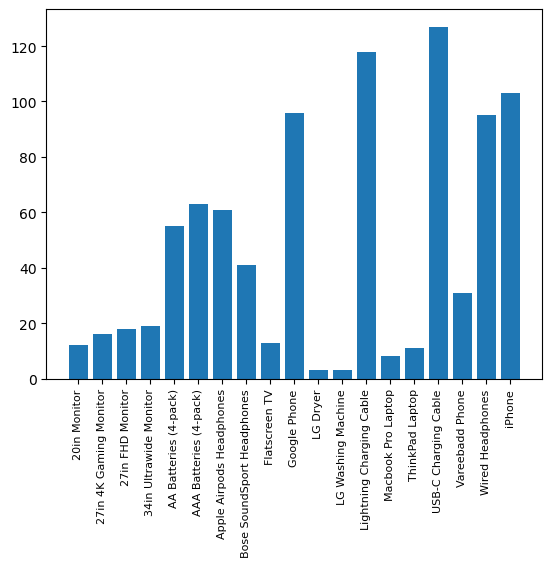

In [185]:
grp = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in grp]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


### Max sold product.

In [218]:
prices = df.groupby('Product')['Price Each'].mean()

### Observation & Hypothesis

By examining the sales data, we identified that products like charging cables and batteries were sold in high quantities, 
unlike higher-priced items such as dryers and washing machines.

We hypothesized that there is a negative correlation between product price and sales volume, 
reasoning that cheaper products are more accessible and thus sold more frequently.


C:\Users\anmol\AppData\Local\Temp\ipykernel_12084\3243889699.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(prices.index, rotation='vertical', size=10)


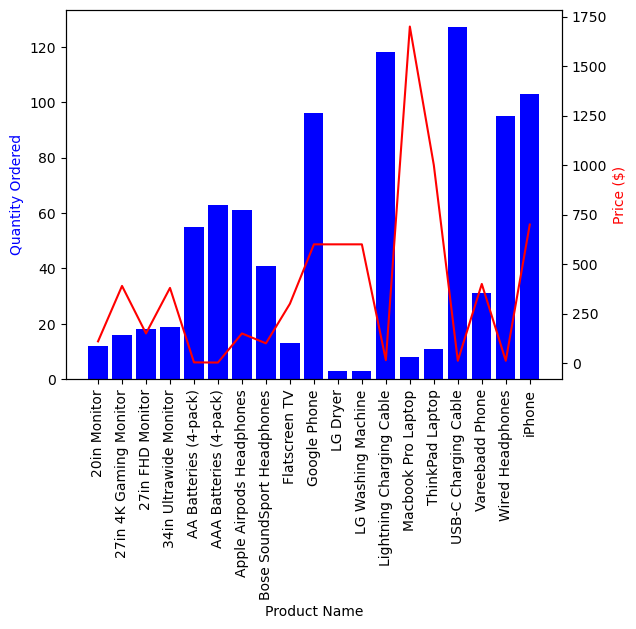

In [221]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prices.index, quantity_ordered, color='b')
ax2.plot(prices.index, prices.values, color='r')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(prices.index, rotation='vertical', size=10)

plt.show()